<a href="https://colab.research.google.com/github/mwithgod3952/jh_Minor_Projects/blob/main/%EC%B1%97%EB%B4%87_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# !pip install tensorflow==1.14.0
# !pip install keras==2.2.4
# !pip install tensorflow-gpu==1.14.0
# !pip install git+https://www.github.com/keras-team/keras-contrib.git

In [96]:
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh
# !git clone https://github.com/entelecheia/eKoNLPy.git
# %cd eKoNLPy/
# !python setup.py install
# !pip install -U finance-datareader

---

In [ ]:
from ekonlpy.tag import Mecab
mecab = Mecab()

In [ ]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')
stock_list = df_krx['Name'].tolist()

In [ ]:
for stock_name in stock_list:
  mecab.add_dictionary(stock_name, 'NNG')

In [ ]:
names = stock_list

def question_generator(names):
    question = []
    for name in names:
        s1 = name+' 알려줘'
        s2 = name+'에 대해 알려줘'
        s3 = name+' 관련 뉴스 보여줘'
        s4 = name+' 기사 보여줘'
        s5 = name+' 주식투자에 필요한 기사 알려줘'
        s6 = name+' 주식에 필요한 내용 알려줘'
        s7 = name+' 주식 관련 추천기사 알려줘'
        s8 = name+' 추천기사'
        s9 = name+' 추천뉴스'
        s10 = name+' 트렌드'
        s11 = name+' 트렌드 알려줘'
        s12 = name+'를 분석해주세요'
        s13 = name+' 분석해봐'
        s14 = name+' 인기있는 기사'
        s15 = name+'의 가장 핫한 이슈가 뭐야'
        s16 = name+'의 반드시 알아야 할 내용'
        s17 = name+' 트렌드 알려줘'
        s18 = name+' 분석해봐'
        s19 = name+' 인기있는 기사'
        s20 = name+'의 가장 핫한 이슈가 뭐야'
        s21 = name+'의 반드시 알아야 할 내용'
        s22 = name+' 소식'
        s23 = name+' 소식 요약해줘'
        s24 = name+' 요약해줘'
        s25 = name+' 투자에 필요한 기사'
        s26 = name+' 투자에 알아야 할 기사'
        s27 = name+' 투자에 알아야 할 뉴스'
        s28 = name+' 필수내용'
        s29 = name+' 주요기사'
        s30 = name+' 주요뉴스'
        s31 = name+' 사업개요 알려줘'
        s32 = name+' 사업 개요가 궁금해'
        s33 = name+'를 분석해줘'
        s34 = name+' 분석'
        s35 = name+' 요약해줘'
        s36 = name+' 요약해주세요'
        s37 = name+' 요약해봐'
        s38 = name+'를 분석해주세요'
        s39 = name+' 분석해봐'
        s40 = name+' 요약'
        s41 = name+' 개요'
        s42 = name+'에 대해 개요를 알려줘봐'
        s43 = name+'의 사업 개요는 뭐야'
        s44 = name+'에 대해서 요약해줘'
        s45 = name+' 기업 개요를 알려줘'
        s46 = name+' 기업 개요를 말해봐'
        s47 = name+'의 개요는 뭘까'
        s48 = name+'의 개요가 뭐야?'
        s49 = name+'사업 개요를 요약해줘'
        s50 = name+'에 대해서 요약해줘'
        s51 = name+'를 요약 해줘'
        s52 = name+'를 요약 분석한다면?'

        question = question+[s1, s2, s3, s4, s5, s6, s6, s7, s8, s9, s10, s11, s12, s13, s15, s16, s17, s18, s19, s20, s21, s22, s23, s24, s25, s26, s27, s28, s29, s30,
                             s31, s32, s33, s34, s35, s36, s37, s38, s39, s40, s41, s42, s43, s44, s45, s46, s47, s48, s49, s50, s51, s52]
    return question

analysis = question_generator(names)

In [ ]:
analysis[len(analysis) - 5:len(analysis)]

['힘스 투자에 알아야 할 기사', '힘스 투자에 알아야 할 뉴스', '힘스 필수내용', '힘스 주요기사', '힘스 주요뉴스']

In [ ]:
from ekonlpy.tag import Mecab
mecab = Mecab()

In [ ]:
# tokenized_test_result = []
# for sample_keyword_question in analysis:
#   tokenized_test_result.append(mecab.morphs(sample_keyword_question))

In [ ]:
analysis_data = {'question' : analysis, 'intent' : ['투자정보']*len(analysis)}
analysis_df = pd.DataFrame(similarity_data, columns=('question', 'intent'))

중략

.

.

.


---

***네이버 기사 및 링크 크롤링 테스트***

In [24]:
import requests
import re

import FinanceDataReader as fdr
from bs4 import BeautifulSoup
import urllib.request
from urllib.request import urlopen, Request
from urllib.parse import quote

import pandas as pd
import numpy as np

# ==============================================================================

def get_news(stock_name, pages):

  stock_ns_df = pd.DataFrame(columns = ('Title', 'Adress'))
  idx = 0

  url_query = quote(stock_name)

  for pg_rng in range(pages):
    url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=' + url_query + str('&start=' + str(pg_rng * 10 + 1))

    surf_url = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(surf_url, 'html.parser')
    links = soup.find_all('div', {'class':'news_wrap api_ani_send'})
    titls = soup.find_all('a', {'class':'news_tit'})
    dates = soup.find_all('span', {'class':'info'})

    for i in range(len(links)):
      news_url = links[i].find('a').get('href')
      news_titl = titls[i].get('title')

      stock_ns_df.loc[idx] = [news_titl, news_url]
      idx += 1

  return stock_ns_df 

In [22]:
comp_list_1 = ['코콤',
             '에스넷',
             '상지카일홈',
             '현대통신',
             '코맥스',
             '에스원',
             'HDC아이콘트롤스',
             '유양디앤유',
             '경동나비엔',
             '피에스텍',
             '포스코ICT',
             '누리텔레콤',
             '옴니시스템',
             '현대리바트',
             '위닉스',
             '엠젠플러스',
             'GS건설',
             'LG전자',
             '삼성전자',
             'Sk텔레콤',
             'KT',
             'LG유플러스']

df_list = []
for crawling_by_cny in range(len(comp_list_1)):
  sub_df = get_news(comp_list[crawling_by_cny], 10)
  df_list.append(sub_df)

In [ ]:
df_result = pd.concat(df_list, axis=0)
df_result.to_excel('labeling_test.xlsx', index=False)

---

***재무재표 크롤링 Test***

In [29]:
# symbol crawling
df_krx = fdr.StockListing('KRX')
df_symbol = df_krx[['Symbol', 'Name']]
df_symbol.tail()

,Symbol,Name
7010,000547,흥국화재2우B
7011,000545,흥국화재우
7012,003280,흥아해운
7013,037440,희림
7014,238490,힘스


In [38]:
def crawling_financial_statement(company_name):
  symbol_idx = np.where(df_symbol.Name == company_name)[0][0]
  symbol = df_symbol.Symbol[symbol_idx]

  URL = f"https://finance.naver.com/item/main.nhn?code={symbol}"

  statement_info = requests.get(URL)
  html = statement_info.text
  soup = BeautifulSoup(html, 'html.parser')
  finance_html = soup.select('div.section.cop_analysis div.sub_section')[0]

  th_data = [item.get_text().strip() for item in finance_html.select('thead th')]
  annual_date = th_data[3:7]
  quarter_date = th_data[7:13]
  finance_index = [item.get_text().strip() for item in finance_html.select('th.h_th2')][3:]
  finance_data = [item.get_text().strip() for item in finance_html.select('td')]
  finance_data = np.array(finance_data)
  finance_data.resize(len(finance_index), 10)
  finance_date = annual_date + quarter_date

  finance = pd.DataFrame(data=finance_data[0:,0:], index=finance_index, columns=finance_date)
  return finance.iloc[:, :4]

In [40]:
crawling_financial_statement('현대통신')

,2018.12,2019.12,2020.12,2021.12(E)
매출액,"1,273","1,046","1,037",
영업이익,201,105,86,
당기순이익,170,107,91,
영업이익률,15.78,10.04,8.32,
순이익률,13.39,10.20,8.81,
ROE(지배주주),25.22,13.60,10.89,
부채비율,47.86,33.92,25.62,
당좌비율,146.69,178.32,171.73,
유보율,"1,672.26","1,852.01","2,014.14",
EPS(원),"1,977","1,236","1,059",


.

.

.

In [41]:
from google.colab import files
uploaded = files.upload()

Saving Intent_jh.xlsx to Intent_jh.xlsx


In [42]:
import io
df_intent = pd.read_excel(io.BytesIO(uploaded['Intent_jh.xlsx']))

In [43]:
df_intent = df_intent[['Title', 'Adress']]
df_intent.columns = ['article', 'intent']
df_intent.tail()

,article,intent
2194,"LGU+ 온라인몰 '유샵', 국내 최초 자급제폰 개통 원스톱 서비스",전략
2195,"SK텔레콤·LG유플러스, 상승에 급등으로 훨훨…SK텔레콤 6% 급등 이어 LG유플러...",주가전망
2196,"디즈니+, KT·LG U+와 3분기 상륙.. 미디어 업계 분주",시장전망
2197,"LG유플러스, ESG 경영 강화 위해 모니터링 시스템 구축",사업확장
2198,"LGU+ 황현식, 100개 국사에 에너지 모니터링 시스템 구축",사업확장


In [44]:
df_intent = df_intent.dropna(how='any', axis=0)
df_intent.isnull().values.any()

False

In [45]:
# df_intent.intent.value_counts()

In [46]:
error = ['주가전망', '전력', '주가정망']
for i in range(3):
  df_intent = df_intent[df_intent.intent != error[i]]

In [47]:
df_intent.intent.value_counts()

주식전망    123
전략      100
홍보       97
사업확장     83
시장전망     37
기타       32
매출       21
Name: intent, dtype: int64

---

In [48]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following packages were automatically installed and are no longer required:
  r-cran-covr r-cran-crosstalk r-cran-dt r-cran-htmlwidgets r-cran-later
  r-cran-lazyeval r-cran-promises r-cran-rex
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 161272 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [49]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [50]:
okt = Okt()

X_train = []
for sentence in df_intent.article:
    temp_X = []
    temp_X = okt.morphs(sentence)
    X_train.append(temp_X)

In [51]:
X_train[:3]

[['주', '총', '통해', '살펴본', '조명', '상', '장사', ',', '위기', '탈출', '전략', '은'],
 ['김기훈', '코콤', '포터', '노벨', '리', '대표', ',', '한국', 'PR', '기업', '협회장', '선출'],
 ['코콤', ',', '비행기', '지', '통합', '관제', '체계', '구축', '사업', '수주']]

In [52]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [53]:
X_train = tokenizer.texts_to_sequences(X_train)

In [54]:
X_train[:3]

[[103, 319, 320, 594, 595, 596, 597, 1, 408, 176, 598, 150],
 [599, 177, 600, 601, 409, 410, 1, 116, 602, 64, 603, 604],
 [177, 1, 605, 117, 321, 411, 606, 65, 15, 253]]

In [55]:
print(tokenizer.word_index)

{',': 1, "'": 2, '통신': 3, 'kt': 4, '현대': 5, '카일': 6, '룸': 7, '상지': 8, '에스': 9, '넷': 10, 'lg': 11, '유플러스': 12, '"': 13, '…': 14, '사업': 15, '-': 16, '서비스': 17, '시스템': 18, '·': 19, '디지털': 20, '[': 21, '+': 22, 'b': 23, ']': 24, '한': 25, '현재': 26, '주가': 27, '헬': 28, '스케': 29, '어': 30, '확대': 31, '교육': 32, 'vi': 33, '발동': 34, '바이오': 35, '에': 36, '로': 37, '협력': 38, '‘': 39, '주식': 40, '와': 41, '테라': 42, '젠': 43, 'lgu': 44, '개통': 45, '과': 46, '빅데이터': 47, '’': 48, '2': 49, '발굴': 50, '돌봄': 51, '+,': 52, '맞': 53, '손': 54, '상승': 55, '용산구': 56, '그룹': 57, '아이': 58, '오피스텔': 59, '시작': 60, '제': 61, 'm': 62, '온라인': 63, '기업': 64, '구축': 65, '정보': 66, '출시': 67, '위': 68, '대': 69, '헬스': 70, '패스': 71, '원스톱': 72, '자급': 73, '폰': 74, '성장': 75, '학원': 76, '협회': 77, '들': 78, '솔루션': 79, '규모': 80, '과징금': 81, 'sk': 82, 'kmac': 83, '6월': 84, '시장': 85, '매출': 86, '관리': 87, '코로나': 88, '원': 89, '개발': 90, '분양': 91, '유': 92, '4월': 93, '스마트': 94, '기반': 95, '“': 96, '도입': 97, '도': 98, '증권': 99, "',": 100, '형': 101, '전일': 102, '

In [56]:
vocab_size = len(tokenizer.word_index) + 1

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


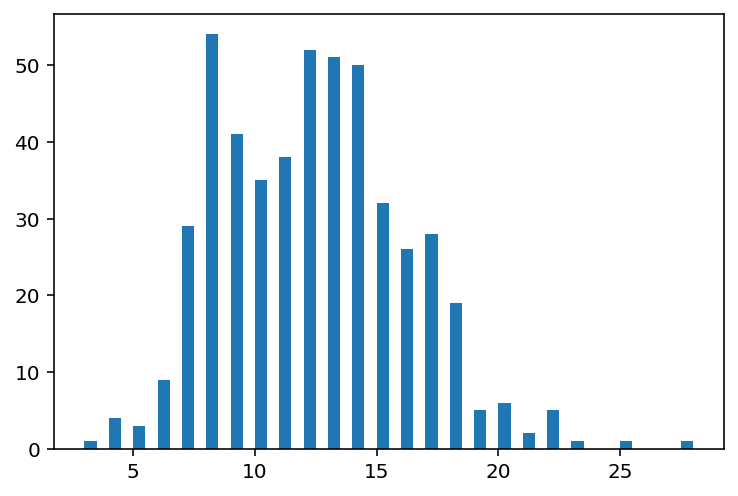

In [57]:
plt.hist([len(x) for x in X_train], bins = 50)
plt.show()

In [58]:
max_len = 25
X_train = pad_sequences(X_train, maxlen = max_len, padding='post')

***Label Encoding***

In [59]:
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(df_intent['intent'])

y_train = idx_encode.transform(df_intent['intent'])

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print(label_idx)

{'기타': 0, '매출': 1, '사업확장': 2, '시장전망': 3, '전략': 4, '주식전망': 5, '홍보': 6}


In [60]:
idx_label = {}
for key, value in label_idx.items():
    idx_label[value] = key

In [61]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

In [62]:
model = Sequential()
model.add(Embedding(vocab_size, 64))
model.add(LSTM(256))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_idx), activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [63]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
493/493 [==============================] - 3s 5ms/sample - loss: 1.9717 - acc: 0.2454
Epoch 2/100
493/493 [==============================] - 0s 871us/sample - loss: 1.7716 - acc: 0.2515
Epoch 3/100
493/493 [==============================] - 0s 866us/sample - loss: 1.6506 - acc: 0.3245
Epoch 4/100
493/493 [==============================] - 0s 857us/sample - loss: 1.4152 - acc: 0.4767
Epoch 5/100
493/493 [==============================] - 0s 854us/sample - loss: 1.3669 - acc: 0.4726
Epoch 6/100
493/493 [==============================] - 0s 833us/sample - loss: 1.2815 - acc: 0.5091
Epoch 7/100
493/493 [==============================] - 0s 852us/sample - loss: 1.1665 - acc: 0.5497
Epoch 8/100
493/493 [==============================] - 0s 855us/sample - loss: 1.0094 - acc: 0.6288
Epoch 9/100
493/493 [==============================] - 0s 873us/sample - loss: 1.0186 - acc: 0.5740
Epoch 10

In [64]:
def article_processing(sentences):
    inputs = []
    for sentence in sentences:
        sentence = okt.morphs(sentence) 
        encoded = tokenizer.texts_to_sequences([sentence])
        inputs.append(encoded[0])
    padded_inputs = pad_sequences(inputs, maxlen=max_len, padding='post')
    return padded_inputs

In [65]:
search_word = '현대통신'
results = get_news(search_word, 10)

input_sentence = article_processing(results['Title'].tolist())

In [66]:
results.tail()

,Title,Adress
95,"현대통신, 20억 규모 자사주 취득 신탁계약 체결",http://www.heraldbiz.com/
96,투자주식 현대통신 주가 8일 현재 9400원,http://nbntv.co.kr/news/view/461720
97,4월 3일 현대통신 증권주식 0.00% 10350원,http://www.nbntv.co.kr/news/articleView.html?i...
98,"공정위, 아파트 마감재 입찰 담합 칼슨·현대통신·은광사 제재",http://www.koscaj.com
99,주가차트 현대통신 주가 5일 현재 9730원,http://nbntv.co.kr/news/view/457368


In [67]:
prediction = np.argmax(model.predict(input_sentence), axis=1)
print(prediction)

[6 6 6 5 3 5 5 3 5 5 5 3 5 5 5 5 5 5 5 5 2 5 5 6 5 5 5 3 0 0 6 4 5 5 5 5 5
 5 5 5 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 6 5 5 5 3 5 5 5 5 0 5 5
 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 5 5 4 5 5 3 5]


In [68]:
prediction_results = []
for p in prediction:
  prediction_results.append(idx_label[p])

In [69]:
from collections import Counter
class_rs = Counter(prediction_results)

In [70]:
class_rs.most_common(1)

[('주식전망', 78)]

In [94]:
idx_num = np.where(pd.DataFrame(prediction_results).iloc[:,0] == str(class_rs.most_common(1)[0][0]))[0].min()
issue = class_rs.most_common(1)[0][0]
recent_topic = results.iloc[idx_num,0]
recent_link = results.iloc[idx_num,1]

print(f'{search_word}에 대해 꼭 알아두셔야 할 핫이슈 키워드는 V{issue} 이고,') 
print(f'해당 이슈의 가장 최근 뉴스 "{recent_topic}"에대한 세부기사는 여기 -> {recent_link} 에서 확인할 수 있어요.')
print('.')
print('=' * 50)
print('최근 4년 간의 재무재표도 확인해보세요!')
print('=' * 50)
print('.')
print(crawling_financial_statement(search_word))

현대통신에 대해 꼭 알아두셔야 할 핫이슈 키워드는 V주식전망 이고,
해당 이슈의 가장 최근 뉴스 "[배당뉴스] 현대통신, 주당 350원 배당...시가배당률 4.3%"에대한 세부기사는 여기 -> http://www.itooza.com/common/iview.php?no=2021031211082445208 에서 확인할 수 있어요.
.
최근 4년 간의 재무재표도 확인해보세요!
.
            2018.12   2019.12   2020.12 2021.12(E)
매출액           1,273     1,046     1,037           
영업이익            201       105        86           
당기순이익           170       107        91           
영업이익률         15.78     10.04      8.32           
순이익률          13.39     10.20      8.81           
ROE(지배주주)     25.22     13.60     10.89           
부채비율          47.86     33.92     25.62           
당좌비율         146.69    178.32    171.73           
유보율        1,672.26  1,852.01  2,014.14           
EPS(원)        1,977     1,236     1,059           
PER(배)         5.46      6.49      7.67           
BPS(원)        8,719     9,685    10,736           
PBR(배)         1.24      0.83      0.76           
주당배당금(원)        300       300       350           
시가배당률(%)       2.78     